In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/neo4j_query_table_data_2024-11-29.csv")

In [ ]:
import re

# Define a function to extract only the DOI number from the text
def extract_doi(data):
    if isinstance(data, str) and "Doi" in data:
        # Use regex to extract the DOI number and ignore any following characters like '})'
        match = re.search(r'Doi\s*([^\s}]+)', data)  # Capture non-whitespace characters until '}'
        if match:
            # Return the DOI number without the unwanted characters
            return match.group(1)
    return None

# Create new columns for DOI values extracted from 'n' and 'm'
df['n_DOI'] = df['n'].apply(extract_doi)
df['m_DOI'] = df['m'].apply(extract_doi)

# Filter out rows where both 'n_DOI' and 'm_DOI' are missing
filtered_df = df.dropna(subset=['n_DOI', 'm_DOI'], how='all')  # Drop rows where both are NaN

# Save the updated DataFrame to a new CSV file
output_file = 'filtered_file.csv'
filtered_df.to_csv(output_file, index=False)

print(f"Filtered CSV saved as {output_file}")


Filtered CSV saved as filtered_file.csv


In [ ]:
unique_dois = pd.concat([filtered_df['n_DOI'], filtered_df['m_DOI']]).dropna().unique()

# Format the query
query = " OR ".join([f"DOI({doi})" for doi in unique_dois])
final_query = f"({query})"

# Print the formatted query
print(final_query)

(DOI(10.1016/j.jmaa.2003.08.017) OR DOI(10.1016/j.camwa.2013.06.025) OR DOI(10.1090/s0025-5718-1978-0483484-9) OR DOI(10.1016/j.camwa.2010.07.026) OR DOI(10.1016/s0377-0427(98)00136-8) OR DOI(10.1093/imanum/19.2.233) OR DOI(10.4208/nmtma.2009.m8015) OR DOI(10.1016/j.apnum.2005.08.002) OR DOI(Doi) OR DOI(10.1007/s11075-005-7079-6) OR DOI(10.1137/0126064) OR DOI(10.1007/bf02896460) OR DOI(10.3233/asy-161357) OR DOI(10.3233/asy-2011-1043) OR DOI(10.2307/2036305) OR DOI(10.1007/s006070170002) OR DOI(10.1016/j.cam.2015.07.011) OR DOI(10.1016/s0022-5193(84)80211-8) OR DOI(10.1006/bulm.1999.0163) OR DOI(10.1007/s10910-014-0402-5) OR DOI(10.3934/math.2021398) OR DOI(10.1016/s0092-8240(88)80057-0) OR DOI(10.1111/febs.12564) OR DOI(10.1042/bst20160400) OR DOI(10.1002/kin.550260408) OR DOI(10.1016/j.physd.2016.12.002) OR DOI(10.1137/20m135073x) OR DOI(10.1007/s00332-003-0582-9) OR DOI(10.1016/j.mbs.2018.09.008) OR DOI(10.3934/mbe.2019255) OR DOI([doi) OR DOI(10.1016/0025-5564(67)90029-6) OR DOI(1

In [ ]:
print(unique_dois.size)


522


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Load the dataset
input_file_name = 'scopus_ml.csv'
df = pd.read_csv(input_file_name, encoding='unicode_escape')

# Initialize a BERT model from sentence-transformers
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Choose an appropriate model

# Generate BERT embeddings for the abstracts
df['Abstract'] = df['Abstract'].fillna('')  # Handle missing values
embeddings = model.encode(df['Abstract'].tolist(), show_progress_bar=True)

# Convert embeddings to a DataFrame for easier handling
embedding_df = pd.DataFrame(embeddings)

# Add unique identifiers (like DOI or id) alongside embeddings
result_df = pd.concat([df[['DOI']], embedding_df], axis=1)

# Save in the required format (tab-separated)
output_file_name = 'bcidata.content'
result_df.to_csv(output_file_name, sep='\t', index=False, header=False)

# Display the resulting DataFrame
print("bcidata.content created successfully!")
print(result_df.head())


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

bcidata.content created successfully!
                            DOI         0         1         2         3  \
0   10.1016/j.apnum.2019.04.002 -0.164033  0.171652  0.123947 -0.087949   
1     10.1016/j.aml.2018.07.019 -0.197121 -0.087521  0.141498 -0.214975   
2  10.1016/j.matcom.2022.11.003 -0.237405  0.019222  0.140657 -0.070294   
3     10.1016/j.cam.2019.03.040 -0.384400  0.111812 -0.151238 -0.315185   
4    10.1016/j.bpj.2020.11.2264 -0.388573 -0.306988  0.187081  0.113483   

          4         5         6         7         8  ...       374       375  \
0 -0.190660 -0.078599 -0.224989  0.007803 -0.081325  ...  0.177733 -0.077399   
1 -0.101708 -0.048013 -0.164791  0.287900  0.084961  ...  0.009806 -0.061291   
2  0.027598 -0.014808 -0.101570  0.141201  0.103264  ...  0.195663 -0.170264   
3  0.087499  0.031472  0.003187  0.188188 -0.123730  ...  0.144321 -0.183002   
4  0.389557  0.188352 -0.279817  0.392351  0.285068  ...  0.056910 -0.063569   

        376       377       37

In [ ]:
import pandas as pd

# Load the CSV with the citation data
df = pd.read_csv('/content/filtered_file.csv', encoding='unicode_escape')

# Extract the 'n_doi' (source DOI) and 'm_doi' (target DOI) columns
# These represent the source and target papers in the citation network
edges = df[['n_DOI', 'm_DOI']].dropna()  # Drop rows where either DOI is missing

# Save the extracted edges as a tab-separated file (bcidata.cites)
edges.to_csv('bcidata.cites', sep='\t', index=False, header=False)

# Print a message indicating success
print(f"Generated 'bcidata.cites' with {len(edges)} edges.")


Generated 'bcidata.cites' with 939 edges.


In [ ]:
import pandas as pd
import networkx as nx
import torch
from torch_geometric.data import Data

# Load node embeddings (bcidata.content)
node_data = pd.read_csv('bcidata.content', sep='\t', header=None)
node_data.set_index(0, inplace=True)  # Set the first column (DOI) as the index

# Load edges (bcidata.cites)
edges = pd.read_csv('bcidata.cites', sep='\t', header=None)

# Create a directed graph
G = nx.DiGraph()

# Add nodes from the embeddings file to the graph
for node_id in node_data.index:
    G.add_node(node_id)  # Ensure each DOI is a node

# Add edges from the citations (bcidata.cites)
for index, row in edges.iterrows():
    source_doi = row[0]
    target_doi = row[1]

    if source_doi in G.nodes and target_doi in G.nodes:
        G.add_edge(source_doi, target_doi)

# Add node embeddings as node attributes in the graph
for node_id, features in node_data.iterrows():
    if node_id in G.nodes:  # Ensure node exists in the graph
        G.nodes[node_id]['embedding'] = features.tolist()

# Normalize DOIs to string format for consistency
# Create a DOI to index mapping (as string keys)
doi_to_idx = {str(doi): idx for idx, doi in enumerate(node_data.index)}

# Convert edges to indices using the DOI to index mapping
edges_index = edges.applymap(lambda x: doi_to_idx.get(str(x), -1))  # Map DOIs to indices
edges_index = edges_index[edges_index >= 0]  # Remove invalid DOI mappings (with -1 index)

# Convert the edges to a tensor format compatible with PyTorch Geometric
edge_index = torch.tensor(edges_index.values.T, dtype=torch.long)  # Transpose to match edge format (2 x N)

# Convert node features (embeddings) to a tensor
x = torch.tensor(node_data.values, dtype=torch.float)  # Embeddings as node features

# Create a data object for PyTorch Geometric
data = Data(x=x, edge_index=edge_index)

# Now you can use the data object in a Graph Neural Network (GNN)
print(data)


Data(x=[475, 384], edge_index=[2, 939])


<ipython-input-16-d8c1c1147677>:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  edges_index = edges.applymap(lambda x: doi_to_idx.get(str(x), -1))  # Map DOIs to indices


In [ ]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.5 MB/s eta 0:00:00


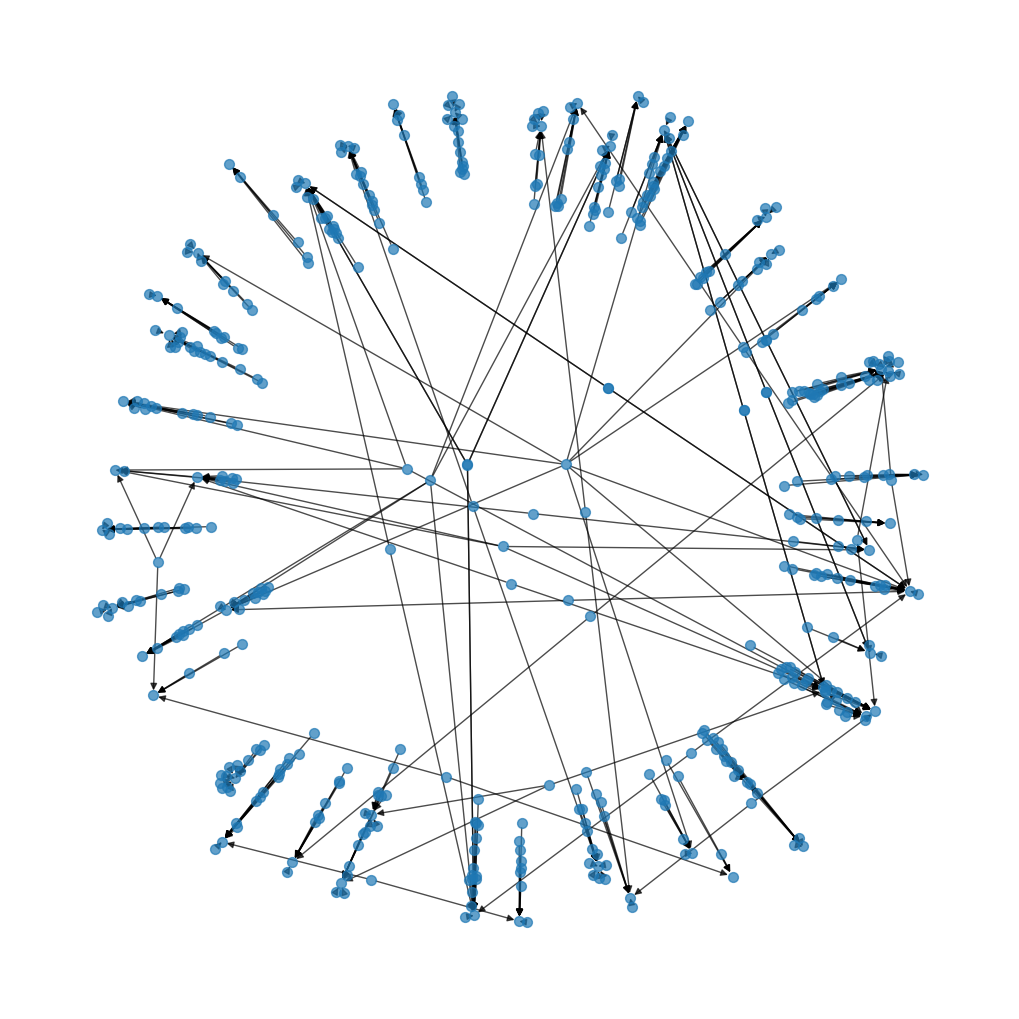

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the PyTorch Geometric Data object to a NetworkX graph
G_nx = nx.from_edgelist(edges.values, create_using=nx.DiGraph)

# Add node embeddings as attributes in the NetworkX graph
for node_id, features in node_data.iterrows():
    if node_id in G_nx.nodes:
        G_nx.nodes[node_id]['embedding'] = features.tolist()

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(G_nx, with_labels=False, node_size=50, font_size=10, alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
import networkx as nx

# Load the node features (embeddings)
node_data = pd.read_csv('bcidata.content', sep='\t', header=None)
node_data.set_index(0, inplace=True)  # Set the first column (DOI) as the index

# Load edges (bcidata.cites)
edges = pd.read_csv('bcidata.cites', sep='\t', header=None)

# Create a directed graph
G = nx.DiGraph()

# Add nodes from the embeddings file to the graph
for node_id in node_data.index:
    # Convert the embedding list to a string (comma-separated)
    embedding_str = ','.join(map(str, node_data.loc[node_id].values.tolist()))
    G.add_node(node_id, embedding=embedding_str)  # Add embedding as a string attribute

# Add edges from the citations (bcidata.cites)
G.add_edges_from(edges.values)

# Write the graph to a GraphML file
nx.write_graphml(G, 'graph_data.graphml')

print("GraphML file created successfully.")


GraphML file created successfully.


In [ ]:
# Compute PageRank
import networkx as nx
pagerank = nx.pagerank(G_nx)

# Find the node with the highest PageRank score
most_influential_node = max(pagerank, key=pagerank.get)

# Get the PageRank score of this node
most_influential_score = pagerank[most_influential_node]

print(f"Most influential paper (node): {most_influential_node}")
print(f"PageRank score: {most_influential_score}")


Most influential paper (node): 10.1142/s0218127424500317
PageRank score: 0.017777648736065486


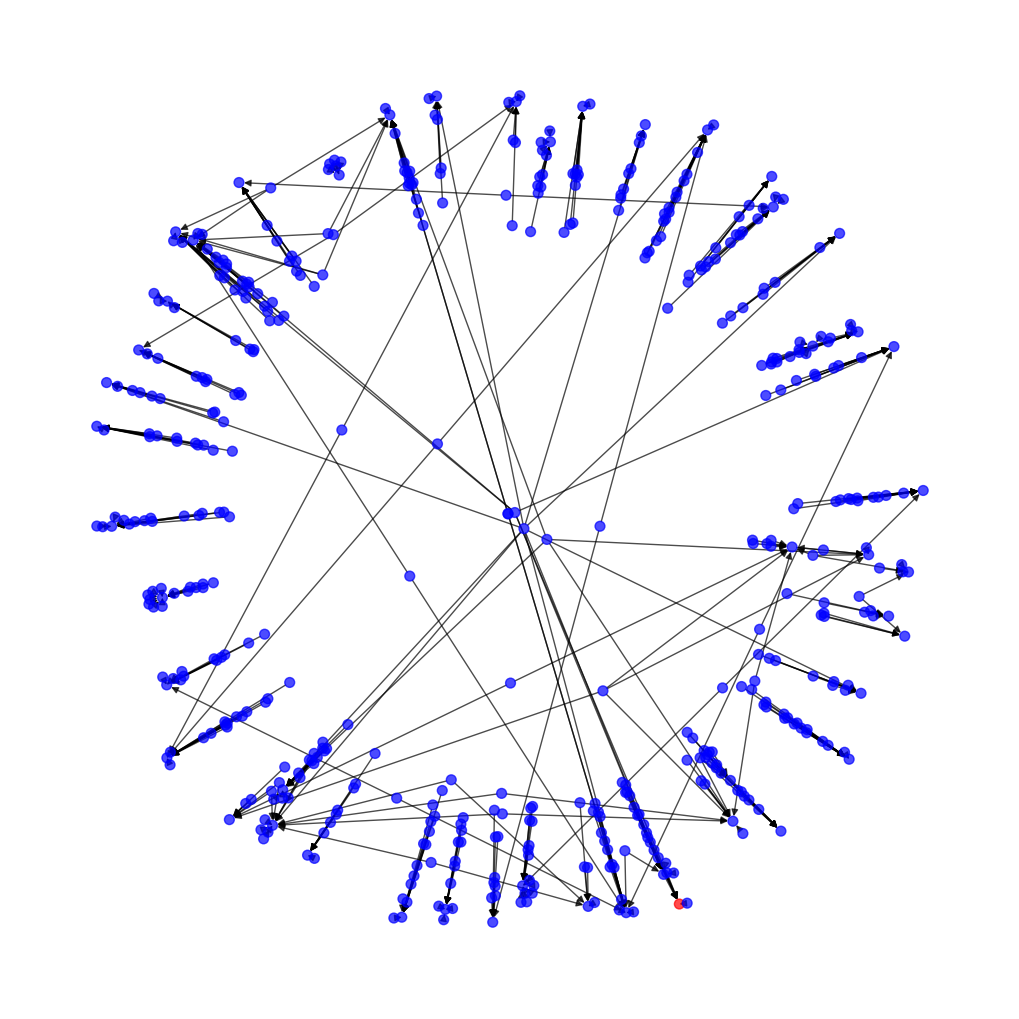

In [ ]:
# Highlight the most influential node in the graph
node_colors = ['red' if node == most_influential_node else 'blue' for node in G_nx.nodes]

plt.figure(figsize=(10, 10))
nx.draw(G_nx, with_labels=False, node_size=50, font_size=10, alpha=0.7, node_color=node_colors)
plt.show()


In [ ]:
# Compute in-degree centrality
in_degree_centrality = dict(G_nx.in_degree())

# Find the node with the highest in-degree centrality
most_influential_node = max(in_degree_centrality, key=in_degree_centrality.get)

# Get the in-degree centrality score of this node
most_influential_score = in_degree_centrality[most_influential_node]

print(f"Most influential paper (node): {most_influential_node}")
print(f"In-degree centrality score: {most_influential_score}")


Most influential paper (node): 10.1007/s11538-023-01150-7
In-degree centrality score: 20


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the embeddings (if not already loaded)
embeddings = result_df.iloc[:, 1:].values  # Exclude DOI column

# Choose the number of clusters (e.g., 3)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Add cluster labels to the DataFrame
result_df['Cluster'] = clusters

# Display a few rows with clusters
print(result_df.head())


                            DOI         0         1         2         3  \
0   10.1016/j.apnum.2019.04.002 -0.164033  0.171652  0.123947 -0.087949   
1     10.1016/j.aml.2018.07.019 -0.197121 -0.087521  0.141498 -0.214975   
2  10.1016/j.matcom.2022.11.003 -0.237405  0.019222  0.140657 -0.070294   
3     10.1016/j.cam.2019.03.040 -0.384400  0.111812 -0.151238 -0.315185   
4    10.1016/j.bpj.2020.11.2264 -0.388573 -0.306988  0.187081  0.113483   

          4         5         6         7         8  ...       375       376  \
0 -0.190660 -0.078599 -0.224989  0.007803 -0.081325  ... -0.077399 -0.018588   
1 -0.101708 -0.048013 -0.164791  0.287900  0.084961  ... -0.061291  0.096128   
2  0.027598 -0.014808 -0.101570  0.141201  0.103264  ... -0.170264 -0.205826   
3  0.087499  0.031472  0.003187  0.188188 -0.123730  ... -0.183002 -0.268017   
4  0.389557  0.188352 -0.279817  0.392351  0.285068  ... -0.063569 -0.066065   

        377       378       379       380       381       382       

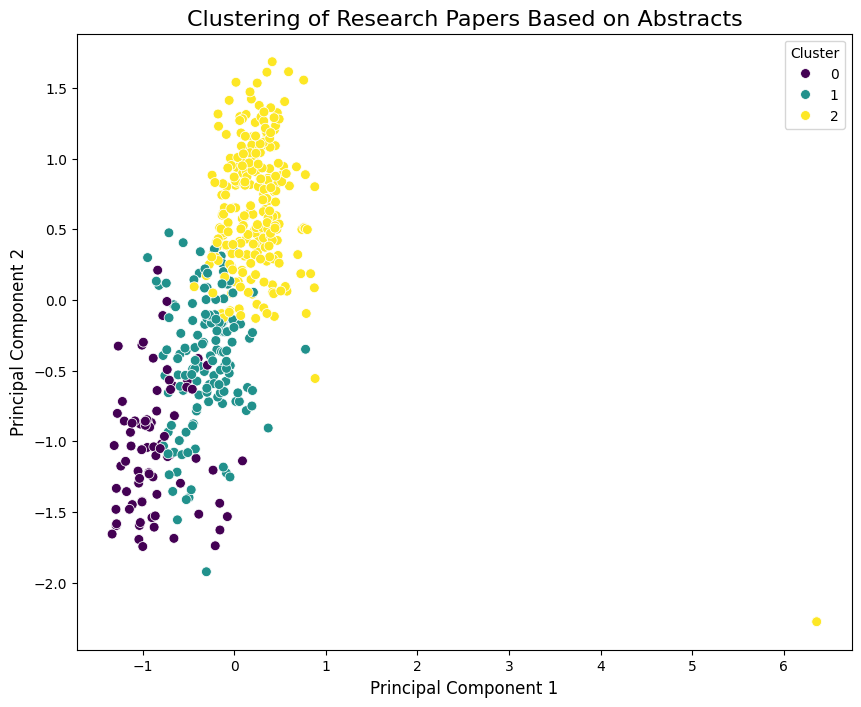

In [ ]:
from sklearn.decomposition import PCA

# Reduce embeddings to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Add PCA dimensions to the DataFrame for plotting
result_df['PCA1'] = reduced_embeddings[:, 0]
result_df['PCA2'] = reduced_embeddings[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=result_df, palette='viridis', s=50
)
plt.title("Clustering of Research Papers Based on Abstracts", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.show()
